# Alunos:
# João Filipe da Silva Brandão - 1915080014
# Leticia Minelvino da Costa - 1915080036
# Davi Rodrigues de França - 1915080053
# Giovanna Souza Teodoro - 1915080065 

# Importação de bibliotecas

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score, recall_score

# Perceptron de Rosenblatt

In [155]:
class Perceptron:
    '''
    The Rosenblatt's Perceptron
    '''
    def __init__(self, data):
        # variaveis constantes 
        self.bias = -1
        self.learning_rate = 0.1
        self.threshold = 0
        
        # variaveis proprias dos dados
        self.x = np.array([[self.bias,x[0],x[1]] for x in data])
        self.labels = np.array([x[2] for x in data])
        self.w = np.array(np.random.uniform(-0.5, 0.5, len(self.x[0])))
        
        # variaveis auxiliares 
        self.epoch = 1
        self.adjustment = 0
        
        print('Pesos iniciais: ', self.w)

    def unit_step(self,u):
        return 1 if u>= 0 else 0

    def weights_update(self,e,i):
        if(e!=0.0):
            self.adjustment += 1
            self.w = self.w + (self.learning_rate*e*self.x[i])
        return self.w

    def check_w(self):
        _labels = np.zeros(len(self.labels))
        for i in range(0, len(self.x)):
            _labels[i] = self.unit_step(sum(self.x[i]*self.w))
        return np.array_equal(_labels, self.labels)

    def learning(self):
        for i in range(0, len(self.x)):
            u = sum(self.x[i]*self.w)
            y = self.unit_step(u)
            e = self.labels[i] - y
            self.w = self.weights_update(e,i)
        self.epoch += 1
        #print(f'Fim da epoca {self.epoch} com o vetor de pesos: {self.w}')
        if (self.check_w()):
            print(f'\nTotal de ajustes no vetor de pesos: {self.adjustment}')
            print(f'Epocas ate a convergencia: {self.epoch}')
            return 0
        else:
            self.learning()

    def learning100(self):
        while self.epoch<100:
            for i in range(0, len(self.x)):
                u = sum(self.x[i]*self.w)
                y = self.unit_step(u)
                e = self.labels[i] - y
                self.w = self.weights_update(e,i)
            self.epoch += 1
        print("Pesos finais: "+ str(self.w))
        return self.w


    def learning_2(self):
        table = PrettyTable()
        table.field_names = [
            'Taxa de Aprendizado',
            'Intervalo de Pesos',
            'Quantidade de Ajustes',
            'Menor número de épocas para convergência'
        ]
        config = np.array([
            [0.4,-100,100],
            [0.4,-0.5,0.5],
            [0.1,-100,100],
            [0.1,-0.5,0.5],
            [0.01,-100,100],
            [0.01,-0.5,0.5]
        ])
        iterations = 10
        for i in range(len(config)):
            adjustments = np.zeros(iterations)
            min_epoch = np.zeros(iterations)
            for j in range(iterations):
                # reset das variaveis auxiliares
                self.epoch = 1
                self.adjustment = 0
                
                # update dos atributos 
                self.learning_rate = config[i][0]
                self.w = np.array(np.random.uniform(config[i][1], config[i][2], len(self.x[0])))
                
                # treinamento
                self.learning()
                
                # adiciona nos arrays os outputs do treinamento
                adjustments[j] = self.adjustment
                min_epoch[j] = self.epoch
                
                # mostra o grafico do ultimo 
                if(j==iterations-1):
                    self.visualize()
            
            # quantidade de ajustes 
            mean_adjustment = np.mean(adjustments)
            std_adjustment = np.std(adjustments)
            
            # menor numero de epoca para convergencia
            min_epochs = min(min_epoch)
            
            # adiciona linha na tabela para cada configuracao
            table.add_row([
                self.learning_rate,
                (config[i][1],config[i][2]),
                str(str(round(mean_adjustment,2)) + '±' + str(round(std_adjustment,2))),
                min_epochs
            ])

        print(table)
        return 0
    
    def learning_holdout(self):
        '''
        Emabaralha e divide o array em dois:
            treinamento: 70% 
            teste: 30%
        '''
        np.random.shuffle(self.x)
        
            
    def transform_to_color(self,number):
        return 'deeppink' if number==0.0 else 'y'
    
    def visualize(self):
        fig, ax = plt.subplots(figsize=(5,5))
        
        # pontos 
        xs = [x[1] for x in self.x]
        ys = [x[2] for x in self.x]
        colors = [self.transform_to_color(x) for x in self.labels]
        ax.scatter(xs,ys,c=colors)
        
        # reta
        _min = min(xs) or min(ys)
        _max = max(xs) and max(ys)
        _x = np.linspace(_min-1,_max+1, 100)
        _y = (self.w[0]/self.w[2]) - ((self.w[1]/self.w[2])*_x)
        plt.plot(_x,_y,linewidth=3,color='g')
        
        plt.show()

    def line(self):       
        # pontos 
        xs = [x[1] for x in self.x]
        ys = [x[2] for x in self.x]
        colors = [self.transform_to_color(x) for x in self.labels]
        
        # reta
        _min = min(xs) or min(ys)
        _max = max(xs) and max(ys)
        _x = np.linspace(_min-1,_max+1, 100)
        _y = (self.w[0]/self.w[2]) - ((self.w[1]/self.w[2])*_x)
        return _x,_y


        
    def predict(self, array, size):
        predicts = np.zeros(size)
        stage = 0
        for i in array:
            x = self.bias*self.w[0]
            y = self.w[1]*i[0]
            z = self.w[2]*i[1]
            result=x+y+z
            resultado=self.unit_step(result)
            predicts[stage]=resultado
            result = 0
            resultado = 0
            stage+=1
        return predicts
    

# Parte 1 - Resolvendo um Problema Linearmente Separável

Pesos iniciais:  [-0.31496418  0.26284319  0.0801111 ]

Total de ajustes no vetor de pesos: 22
Epocas ate a convergencia: 16


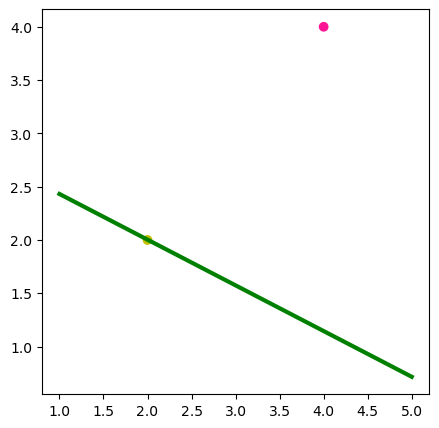

In [156]:
data = np.array([[2,2,1],[4,4,0]]) #self.w = np.array([-0.5441,0.5562,-0.4074])
tutorial = Perceptron(data)
tutorial.learning()
tutorial.visualize();

Pesos iniciais:  [-0.32952233 -0.04609608  0.39703104]

Total de ajustes no vetor de pesos: 55
Epocas ate a convergencia: 4


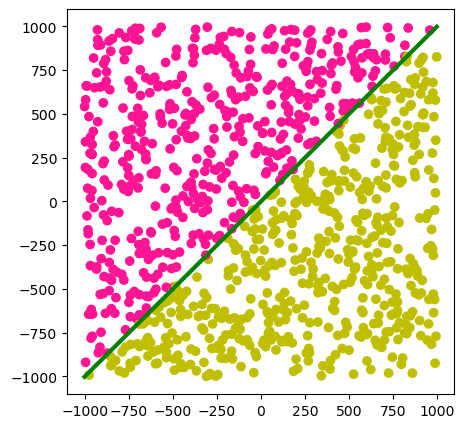

In [157]:
dataAll = np.fromfile('./arquivos/dataAll.txt').reshape(-1,3)
_dataAll = Perceptron(dataAll)
_dataAll.learning()
_dataAll.visualize();

# Parte 2 - Experimentação

Pesos iniciais:  [ 0.00910215 -0.10081833 -0.03394573]

Total de ajustes no vetor de pesos: 262
Epocas ate a convergencia: 11

Total de ajustes no vetor de pesos: 137
Epocas ate a convergencia: 10

Total de ajustes no vetor de pesos: 230
Epocas ate a convergencia: 12

Total de ajustes no vetor de pesos: 251
Epocas ate a convergencia: 6

Total de ajustes no vetor de pesos: 560
Epocas ate a convergencia: 6

Total de ajustes no vetor de pesos: 357
Epocas ate a convergencia: 24

Total de ajustes no vetor de pesos: 359
Epocas ate a convergencia: 18

Total de ajustes no vetor de pesos: 254
Epocas ate a convergencia: 28

Total de ajustes no vetor de pesos: 640
Epocas ate a convergencia: 13

Total de ajustes no vetor de pesos: 373
Epocas ate a convergencia: 6


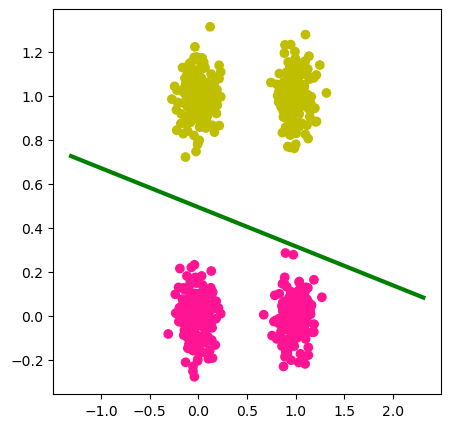


Total de ajustes no vetor de pesos: 8
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 6
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 9
Epocas ate a convergencia: 5

Total de ajustes no vetor de pesos: 7
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 2
Epocas ate a convergencia: 2

Total de ajustes no vetor de pesos: 9
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 8
Epocas ate a convergencia: 3

Total de ajustes no vetor de pesos: 4
Epocas ate a convergencia: 3

Total de ajustes no vetor de pesos: 6
Epocas ate a convergencia: 3

Total de ajustes no vetor de pesos: 10
Epocas ate a convergencia: 4


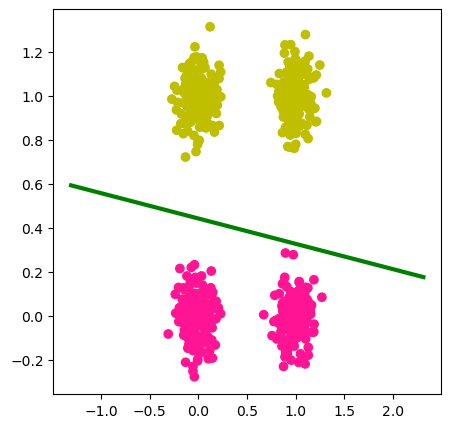


Total de ajustes no vetor de pesos: 766
Epocas ate a convergencia: 118

Total de ajustes no vetor de pesos: 1189
Epocas ate a convergencia: 70

Total de ajustes no vetor de pesos: 522
Epocas ate a convergencia: 124

Total de ajustes no vetor de pesos: 583
Epocas ate a convergencia: 11

Total de ajustes no vetor de pesos: 1169
Epocas ate a convergencia: 94

Total de ajustes no vetor de pesos: 1618
Epocas ate a convergencia: 40

Total de ajustes no vetor de pesos: 1906
Epocas ate a convergencia: 20

Total de ajustes no vetor de pesos: 1221
Epocas ate a convergencia: 15

Total de ajustes no vetor de pesos: 852
Epocas ate a convergencia: 28

Total de ajustes no vetor de pesos: 370
Epocas ate a convergencia: 8


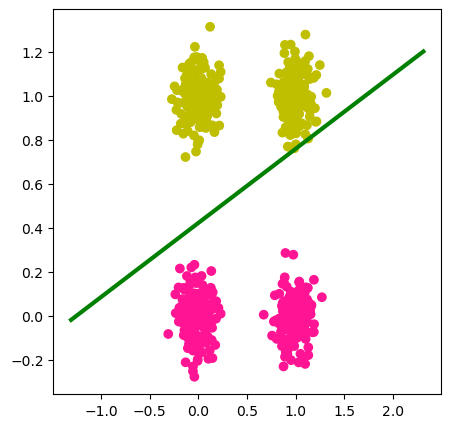


Total de ajustes no vetor de pesos: 20
Epocas ate a convergencia: 5

Total de ajustes no vetor de pesos: 20
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 22
Epocas ate a convergencia: 7

Total de ajustes no vetor de pesos: 13
Epocas ate a convergencia: 5

Total de ajustes no vetor de pesos: 13
Epocas ate a convergencia: 6

Total de ajustes no vetor de pesos: 16
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 10
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 17
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 16
Epocas ate a convergencia: 5

Total de ajustes no vetor de pesos: 7
Epocas ate a convergencia: 3


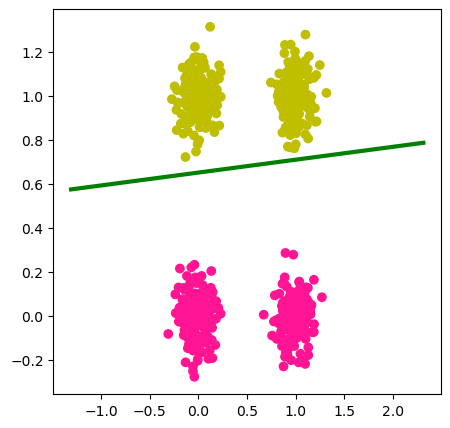


Total de ajustes no vetor de pesos: 14008
Epocas ate a convergencia: 641

Total de ajustes no vetor de pesos: 30279
Epocas ate a convergencia: 383

Total de ajustes no vetor de pesos: 15236
Epocas ate a convergencia: 76

Total de ajustes no vetor de pesos: 6249
Epocas ate a convergencia: 82

Total de ajustes no vetor de pesos: 19707
Epocas ate a convergencia: 82

Total de ajustes no vetor de pesos: 9312
Epocas ate a convergencia: 284

Total de ajustes no vetor de pesos: 15915
Epocas ate a convergencia: 80

Total de ajustes no vetor de pesos: 6320
Epocas ate a convergencia: 201

Total de ajustes no vetor de pesos: 1905
Epocas ate a convergencia: 68

Total de ajustes no vetor de pesos: 6851
Epocas ate a convergencia: 131


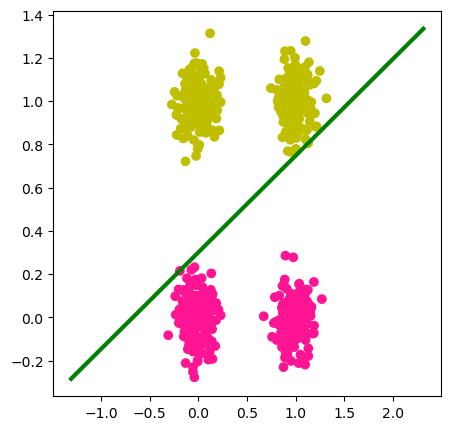


Total de ajustes no vetor de pesos: 7
Epocas ate a convergencia: 2

Total de ajustes no vetor de pesos: 77
Epocas ate a convergencia: 5

Total de ajustes no vetor de pesos: 1
Epocas ate a convergencia: 2

Total de ajustes no vetor de pesos: 27
Epocas ate a convergencia: 3

Total de ajustes no vetor de pesos: 88
Epocas ate a convergencia: 5

Total de ajustes no vetor de pesos: 42
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 6
Epocas ate a convergencia: 5

Total de ajustes no vetor de pesos: 46
Epocas ate a convergencia: 4

Total de ajustes no vetor de pesos: 114
Epocas ate a convergencia: 6

Total de ajustes no vetor de pesos: 5
Epocas ate a convergencia: 2


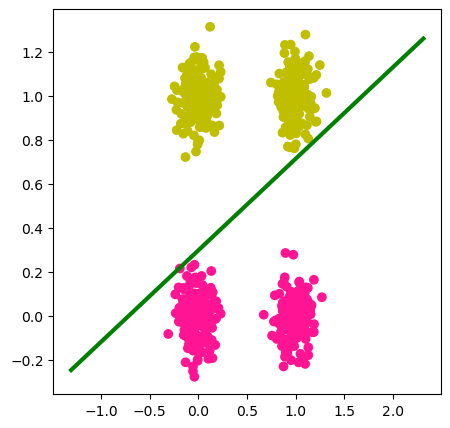

+---------------------+--------------------+-----------------------+------------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes | Menor número de épocas para convergência |
+---------------------+--------------------+-----------------------+------------------------------------------+
|         0.4         |  (-100.0, 100.0)   |      342.3±146.56     |                   6.0                    |
|         0.4         |    (-0.5, 0.5)     |        6.9±2.34       |                   2.0                    |
|         0.1         |  (-100.0, 100.0)   |     1019.6±467.76     |                   8.0                    |
|         0.1         |    (-0.5, 0.5)     |       15.4±4.48       |                   3.0                    |
|         0.01        |  (-100.0, 100.0)   |     12578.2±7880.3    |                   68.0                   |
|         0.01        |    (-0.5, 0.5)     |       41.3±37.86      |                   2.0              

In [158]:
data0 = np.fromfile('./arquivos/data0.txt').reshape(-1,3)
_data0 = Perceptron(data0)
_data0.learning_2();

# Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

In [159]:
dataHoldout = np.fromfile('./arquivos/dataHoldout.txt').reshape(-1,3)

Gráfico apresentando o fato de não ser lienarmente separável

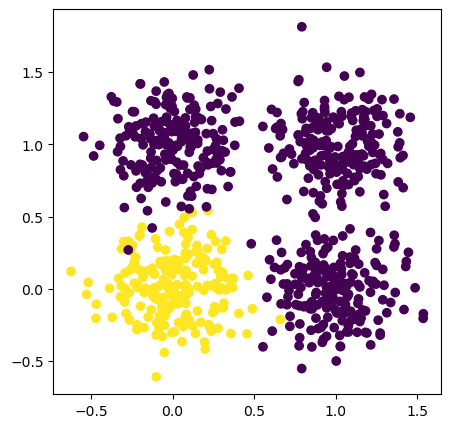

In [160]:
# Visualizando que nao eh linearmente separavel
xs = [x[0] for x in dataHoldout]
ys = [x[1] for x in dataHoldout]
labels = [x[2] for x in dataHoldout]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(xs,ys,c=labels)
plt.show()

Separação em 60% para dados de treino e 40% para dados de teste

In [161]:
dataHoldout = np.fromfile('arquivos\dataHoldout.txt').reshape(-1,3)
np.random.shuffle(dataHoldout)
treino, teste = dataHoldout[:480], dataHoldout[480:]

Previsão dos casos de teste

Pesos iniciais:  [ 0.07384588  0.46635184 -0.1866018 ]
Pesos finais: [-0.32615412 -0.42383218 -0.45497518]


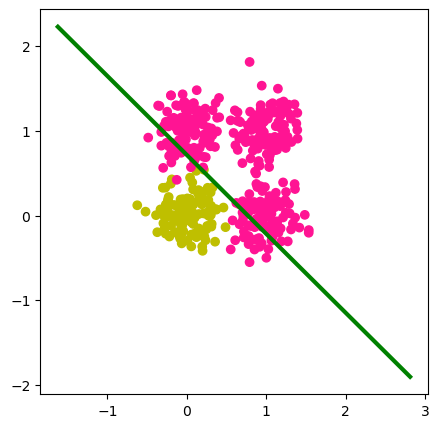

In [162]:
_dataHoldout = Perceptron(treino)
pesos = _dataHoldout.learning100()
testes = _dataHoldout.predict(teste, len(teste)) #Valores retornados nas previsões
_dataHoldout.visualize()

Matriz  de confusão

In [163]:
#Valores reais do dataset
trueValues = np.zeros(len(teste))
stage = 0
for i in teste:
    trueValues[stage] = i[2]
    stage+=1

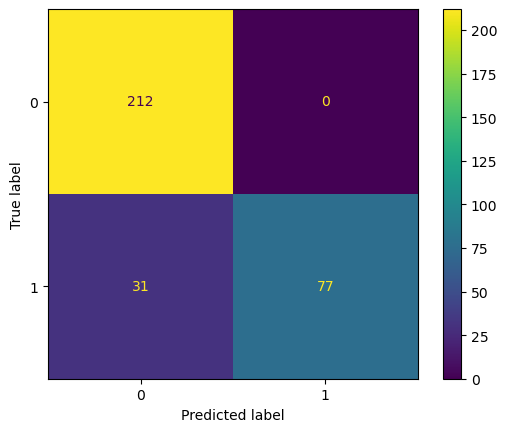

In [164]:
'''
Matriz de confusão
'''
matriz = confusion_matrix(testes, trueValues)
cm = ConfusionMatrixDisplay(confusion_matrix=matriz)
cm.plot()

In [165]:
acuracia = accuracy_score(testes, trueValues)
precisao = precision_score(testes, trueValues, average='macro')
f1 = f1_score(testes, trueValues, average='macro')
revogacao = recall_score(testes, trueValues, average='macro')
print("Acurácia: " + str(acuracia))
print("Precisão: " + str(precisao))
print("Revocação: " + str(revogacao))
print("F1 score: " + str(f1))

Acurácia: 0.903125
Precisão: 0.9362139917695473
Revocação: 0.8564814814814814
F1 score: 0.8821502821502822


Ainda que não seja um problema linearmente separável, os pesos obtidos no fim do treinamento geraram uma reta que separa corretamente todos os pontos de uma classe, como visto pela primeira coluna da matriz de confusão. Os  pontos da segunda classe erroneamente classificados contribuíram com a diminuição das métricas de performance que foram obtidas a partir do conjunto de teste, mas não o suficiente para descartar o uso do perceptron para resolver esse problema. Pelo contrário, haja vista todas as métricas serem acima de 90%, houve êxito na otimização da reta para divisão dos pontos em classes.

# Gráficos finais

Text(0.5, 1.0, 'Dados de teste')

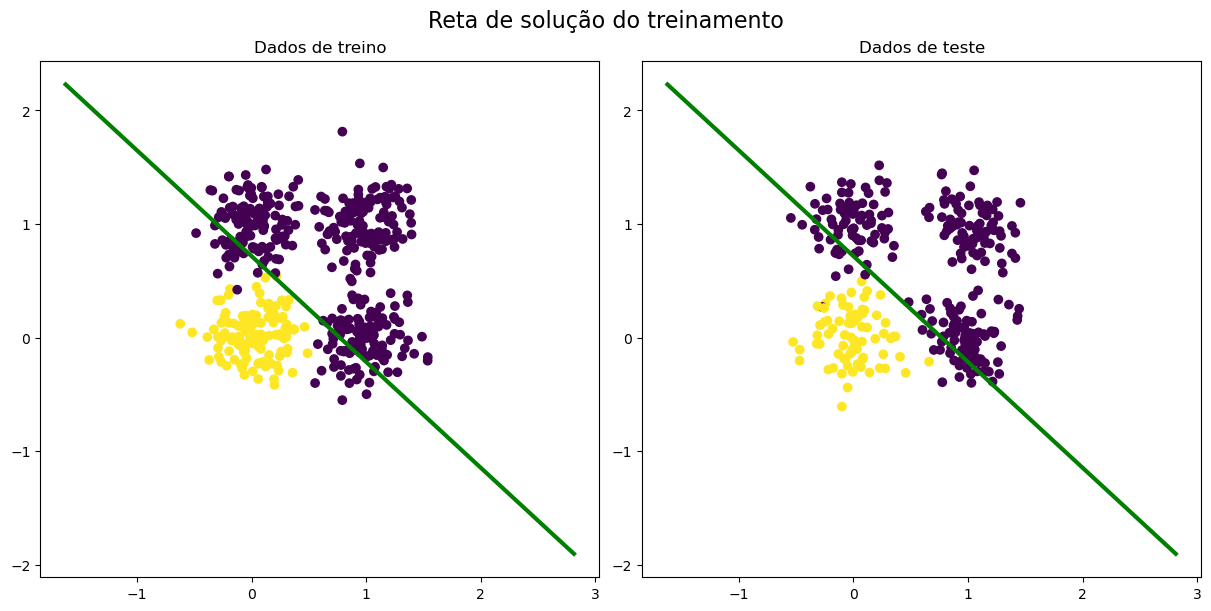

In [166]:
_x, _y = _dataHoldout.line()


xs = [x[0] for x in treino]
ys = [x[1] for x in treino]
labels = [x[2] for x in treino]


fig2, axs = plt.subplots(1, 2, constrained_layout=True)

fig2.set_figheight(6)
fig2.set_figwidth(12)

axs[0].scatter(xs,ys,c=labels)
axs[0].plot(_x,_y,linewidth=3,color='g')
axs[0].set_title("Dados de treino")

fig2.suptitle('Reta de solução do treinamento', fontsize=16)

xss = [x[0] for x in teste]
yss = [x[1] for x in teste]
labels2 = [x[2] for x in teste]
axs[1].scatter(xss,yss,c=labels2)
axs[1].plot(_x,_y,linewidth=3,color='g')
axs[1].set_title("Dados de teste")
